<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Indian-Hotel-Industry-Analysis/Indian_Hotel_Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

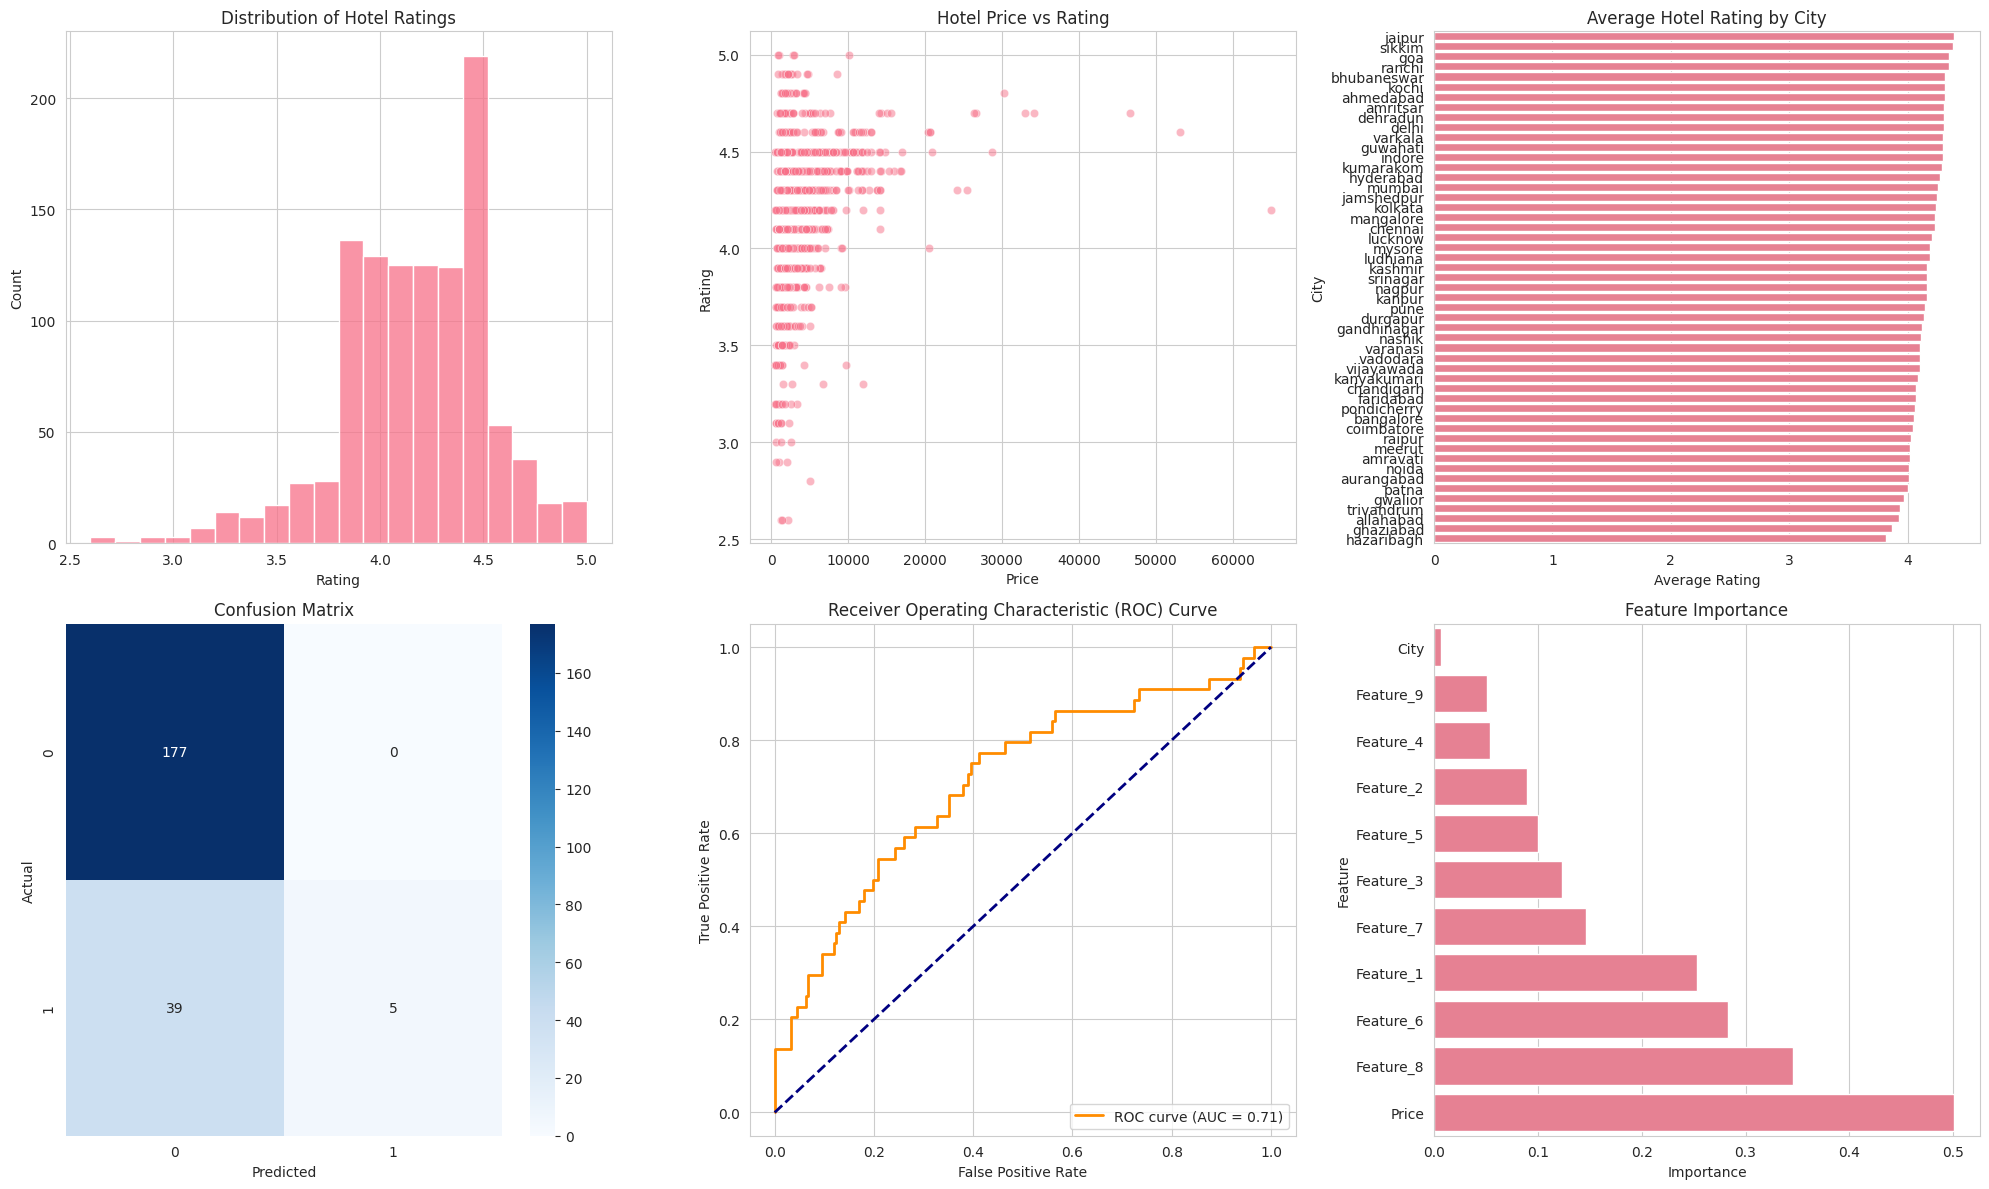


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       177
           1       1.00      0.11      0.20        44

    accuracy                           0.82       221
   macro avg       0.91      0.56      0.55       221
weighted avg       0.86      0.82      0.76       221


Summary Statistics by City:
            Hotel_Rating             Hotel_Price          
                   count  mean   std        mean       std
City                                                      
ahmedabad             23  4.31  0.37     5129.09   2239.82
allahabad             22  3.92  0.59     2495.00   1604.35
amravati              17  4.02  0.22     2533.59    920.19
amritsar              24  4.31  0.27     4087.83   2700.37
aurangabad            22  4.01  0.27     2785.59   2012.62
bangalore             22  4.05  0.41     4018.68   2706.13
bhubaneswar           19  4.32  0.26     4272.26   2718.00
chandigarh            23  4.07

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import plotly.express as px
import plotly.graph_objects as go

# Set style for better visualizations
# Use a Seaborn style name that's compatible with Matplotlib
# Instead of plt.style.use(), use sns.set_style() for Seaborn styles
sns.set_style('whitegrid')  # Use 'whitegrid' which is the base for 'seaborn-whitegrid'
sns.set_palette("husl")

# Read the dataset
df = pd.read_csv('/content/google_hotel_data_clean_v2.csv')

# Data Preprocessing
# Convert Hotel_Rating to binary classification (1 if rating >= 4.5, 0 otherwise)
df['High_Rating'] = (df['Hotel_Rating'] >= 4.5).astype(int)

# Feature engineering
# Encode categorical variables
le = LabelEncoder()
df['City_Encoded'] = le.fit_transform(df['City'])

# Create feature columns from Feature_1 to Feature_9
feature_columns = ['Feature_' + str(i) for i in range(1, 10)]
for feature in feature_columns:
    df[feature + '_Encoded'] = le.fit_transform(df[feature])

# Prepare features for modeling
X = df[['City_Encoded', 'Hotel_Price'] + [f + '_Encoded' for f in feature_columns]]
y = df['High_Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Create visualizations
plt.figure(figsize=(20, 12))

# 1. Distribution of Hotel Ratings
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='Hotel_Rating', bins=20)
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# 2. Price vs Rating Scatter Plot
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Hotel_Price', y='Hotel_Rating', alpha=0.5)
plt.title('Hotel Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')

# 3. Average Rating by City
plt.subplot(2, 3, 3)
city_ratings = df.groupby('City')['Hotel_Rating'].mean().sort_values(ascending=False)
sns.barplot(x=city_ratings.values, y=city_ratings.index)
plt.title('Average Hotel Rating by City')
plt.xlabel('Average Rating')

# 4. Confusion Matrix Heatmap
plt.subplot(2, 3, 4)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 5. ROC Curve
plt.subplot(2, 3, 5)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# 6. Feature Importance
plt.subplot(2, 3, 6)
feature_importance = pd.DataFrame({
    'Feature': ['City', 'Price'] + [f'Feature_{i}' for i in range(1, 10)],
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create summary tables
print("\nSummary Statistics by City:")
city_summary = df.groupby('City').agg({
    'Hotel_Rating': ['count', 'mean', 'std'],
    'Hotel_Price': ['mean', 'std']
}).round(2)
print(city_summary)

# Feature frequency analysis
print("\nTop Features Analysis:")
for feature in feature_columns:
    print(f"\n{feature} Distribution:")
    print(df[feature].value_counts().head())

# Model performance metrics
print("\nModel Performance Metrics:")
print(f"Model Accuracy: {model.score(X_test_scaled, y_test):.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")

# Additional interactive visualization using plotly
# Create a scatter plot of Price vs Rating with hover information
fig = px.scatter(df, x='Hotel_Price', y='Hotel_Rating',
                 color='City', hover_data=['Hotel_Name'],
                 title='Hotel Price vs Rating by City')
fig.show()

# Create a box plot of ratings by city
fig = px.box(df, x='City', y='Hotel_Rating',
             title='Hotel Ratings Distribution by City')
fig.show()

# Create a sunburst chart of City -> Rating -> Price
df['Rating_Category'] = pd.qcut(df['Hotel_Rating'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Price_Category'] = pd.qcut(df['Hotel_Price'], q=4, labels=['Budget', 'Moderate', 'Expensive', 'Luxury'])

fig = px.sunburst(df, path=['City', 'Rating_Category', 'Price_Category'],
                  title='Hierarchical View of Hotels by City, Rating, and Price')
fig.show()

In [ ]:
!pip install shap

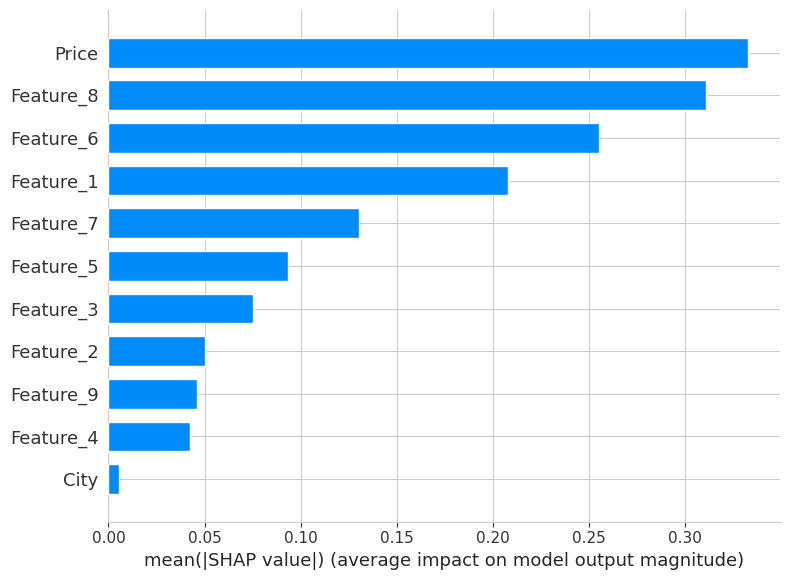

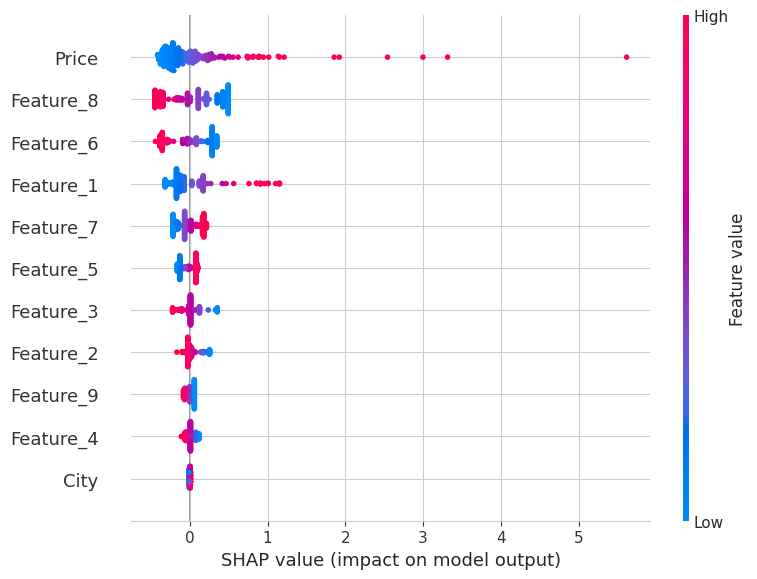


Feature Importance Based on SHAP Values:
      Feature  Absolute_SHAP_Value  Mean_SHAP_Value
1       Price             0.332742         0.034471
9   Feature_8             0.310989         0.053021
7   Feature_6             0.255334         0.005715
2   Feature_1             0.207987        -0.010933
8   Feature_7             0.130133        -0.008139
6   Feature_5             0.093250        -0.016073
4   Feature_3             0.075238         0.017620
3   Feature_2             0.050255         0.017580
10  Feature_9             0.045838         0.000350
5   Feature_4             0.042612         0.006419
0        City             0.005320        -0.000680


AttributeError: 'LinearExplainer' object has no attribute 'shap_interaction_values'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import shap
import warnings
warnings.filterwarnings('ignore')

# Read data
df = pd.read_csv('/content/google_hotel_data_clean_v2.csv')

# Preprocessing
df['High_Rating'] = (df['Hotel_Rating'] >= 4.5).astype(int)
le = LabelEncoder()
df['City_Encoded'] = le.fit_transform(df['City'])

feature_columns = ['Feature_' + str(i) for i in range(1, 10)]
for feature in feature_columns:
    df[feature + '_Encoded'] = le.fit_transform(df[feature])

X = df[['City_Encoded', 'Hotel_Price'] + [f + '_Encoded' for f in feature_columns]]
feature_names = ['City', 'Price'] + [f'Feature_{i}' for i in range(1, 10)]
y = df['High_Rating']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# SHAP analysis
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)
shap_values = explainer.shap_values(X_test_scaled)

# Plotting
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.savefig('shap_importance.png')
plt.close()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.savefig('shap_summary.png')
plt.close()

# Feature importance statistics
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Absolute_SHAP_Value': np.abs(shap_values).mean(0),
    'Mean_SHAP_Value': shap_values.mean(0)
}).sort_values('Absolute_SHAP_Value', ascending=False)

print("\nFeature Importance Based on SHAP Values:")
print(shap_importance)

# Interaction values
interaction_values = shap.LinearExplainer(model, X_train_scaled).shap_interaction_values(X_test_scaled)

plt.figure(figsize=(12, 8))
shap.summary_plot(interaction_values, X_test_scaled, feature_names=feature_names, max_display=10)
plt.title("SHAP Interaction Values")
plt.tight_layout()
plt.savefig('shap_interactions.png')
plt.close()

# Export results
shap_importance.to_csv('shap_importance.csv', index=False)